In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('taxi_trip_pricing.csv')
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [3]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [4]:
print(df['Time_of_Day'].mode())
df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0], inplace=True)
print(df['Time_of_Day'].value_counts())
df['Time_of_Day'].isna().sum()

0    Afternoon
Name: Time_of_Day, dtype: object
Time_of_Day
Afternoon    421
Morning      283
Evening      203
Night         93
Name: count, dtype: int64


C:\Users\cappr\AppData\Local\Temp\ipykernel_13620\4016014132.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0], inplace=True)


0

In [5]:
print(df['Day_of_Week'].mode())
df['Day_of_Week'].fillna(df['Day_of_Week'].mode()[0], inplace=True)
print(df['Day_of_Week'].value_counts())
df['Day_of_Week'].isna().sum()

0    Weekday
Name: Day_of_Week, dtype: object
Day_of_Week
Weekday    705
Weekend    295
Name: count, dtype: int64


C:\Users\cappr\AppData\Local\Temp\ipykernel_13620\1003327034.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Day_of_Week'].fillna(df['Day_of_Week'].mode()[0], inplace=True)


0

In [6]:
print(df['Traffic_Conditions'].mode())
df['Traffic_Conditions'].fillna(df['Traffic_Conditions'].mode()[0], inplace=True)
print(df['Traffic_Conditions'].value_counts())
df['Traffic_Conditions'].isna().sum()

0    Low
Name: Traffic_Conditions, dtype: object
Traffic_Conditions
Low       447
Medium    371
High      182
Name: count, dtype: int64


C:\Users\cappr\AppData\Local\Temp\ipykernel_13620\3512827463.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Traffic_Conditions'].fillna(df['Traffic_Conditions'].mode()[0], inplace=True)


0

In [7]:
print(df['Weather'].mode())
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)
print(df['Weather'].value_counts())
df['Weather'].isna().sum()

0    Clear
Name: Weather, dtype: object
Weather
Clear    717
Rain     227
Snow      56
Name: count, dtype: int64


C:\Users\cappr\AppData\Local\Temp\ipykernel_13620\1089706488.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)


0

In [8]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day               0
Day_of_Week               0
Passenger_Count          50
Traffic_Conditions        0
Weather                   0
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

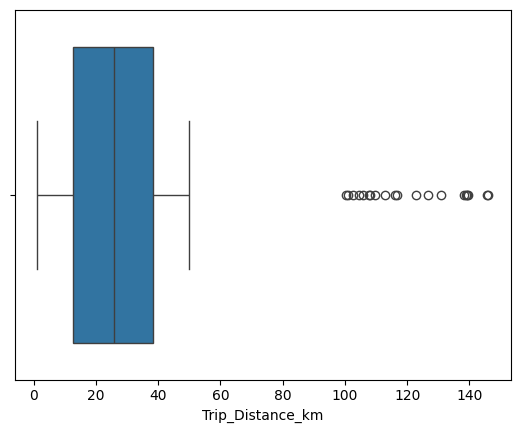

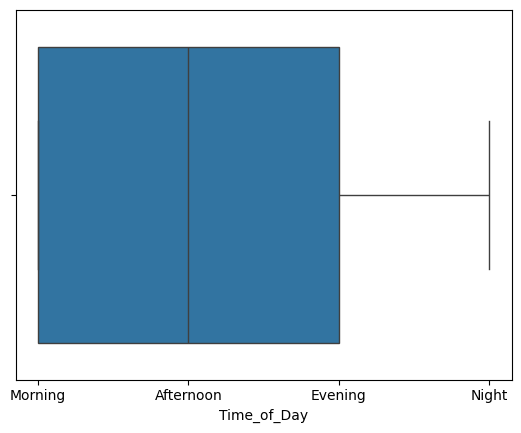

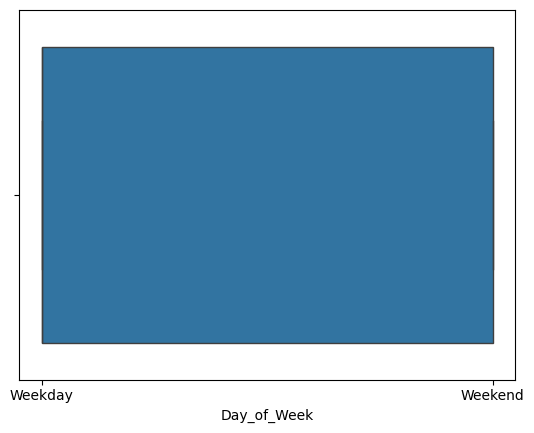

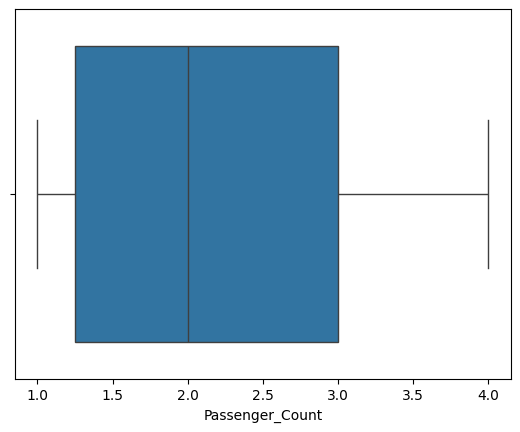

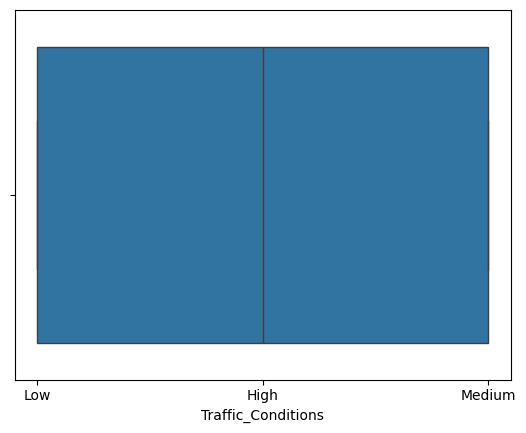

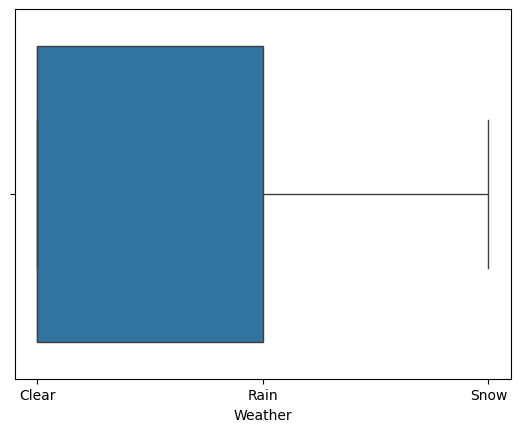

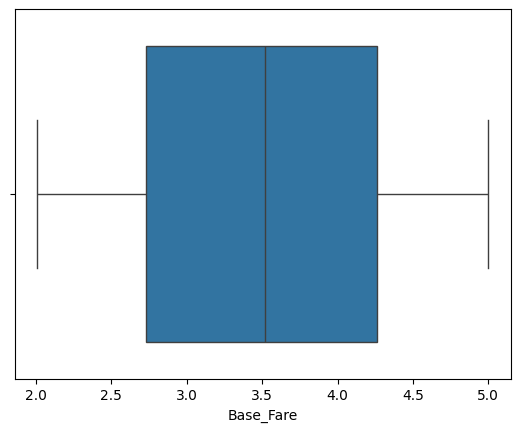

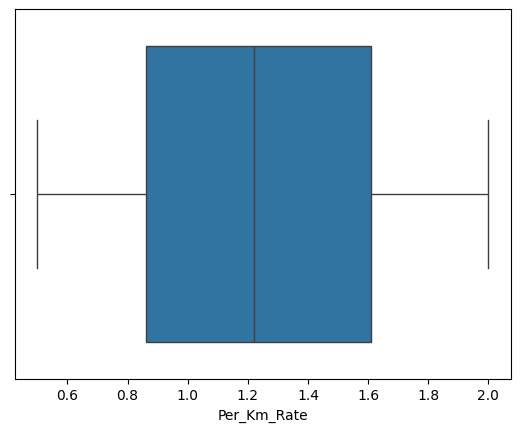

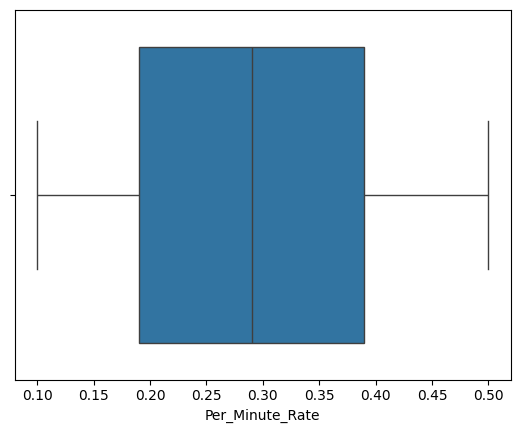

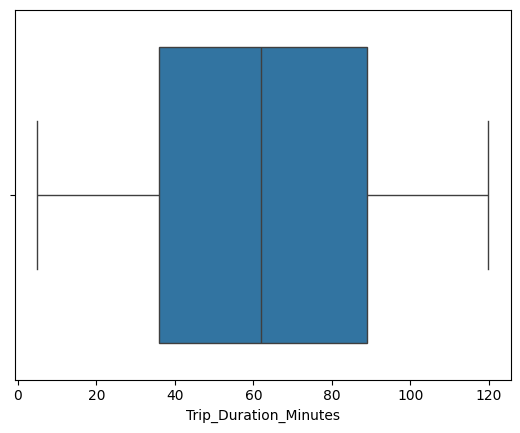

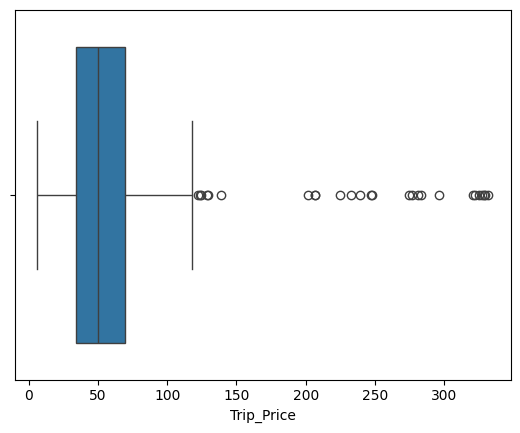

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

for c in df.columns:
    sns.boxplot(x=df[c])
    plt.show()

In [10]:
df['Trip_Distance_km'].value_counts()

Trip_Distance_km
10.14    3
13.64    3
32.04    3
31.29    3
3.22     3
        ..
32.12    1
19.36    1
31.67    1
25.65    1
22.85    1
Name: count, Length: 867, dtype: int64

In [11]:

import numpy as np


# Compute Z-Scores
mean = df['Trip_Distance_km'].mean()
std_dev = df['Trip_Distance_km'].std()
df['z_score'] = (df['Trip_Distance_km'] - mean) / std_dev

# Identify Outliers (|Z-score| > 3)
df['outliers'] = df['z_score'].abs() > 3
#print(outliers.value_counts())
df[df['outliers'] == True]['Trip_Distance_km']


22     105.943550
27     138.098328
64     146.067047
108    112.830958
110    102.747556
141    109.616082
225    130.809001
267    116.196064
268    139.062230
287    100.380420
302    145.747060
338    116.667681
410    104.371791
481    107.786832
532    139.476515
588    122.820191
616    138.763887
747    101.039704
797    108.146994
835    126.547628
Name: Trip_Distance_km, dtype: float64

In [12]:

import numpy as np


# Compute Z-Scores
mean1 = df['Trip_Price'].mean()
std_dev1 = df['Trip_Price'].std()
df['z_score1'] = (df['Trip_Price'] - mean1) / std_dev1

# Identify Outliers (|Z-score| > 3)
df['outliers1'] = df['z_score1'].abs() > 3
#print(outliers.value_counts())
df[df['outliers1'] == True]['Trip_Price']

22     201.869509
27     280.877302
64     320.958664
108    233.008285
110    274.535087
141    327.217665
225    328.871769
267    206.699570
268    276.840597
287    329.913004
302    325.098950
338    248.295209
410    206.508652
481    322.725996
532    296.088697
588    247.598318
616    332.043689
747    283.645201
797    239.171407
835    224.914663
Name: Trip_Price, dtype: float64

In [13]:
missing_cols = df.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]
missing_cols
df_cleaned = df
for c in missing_cols.index:
    df_cleaned[c] = df_cleaned[c].fillna(df[c].median())
df_cleaned.isna().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
z_score                  0
outliers                 0
z_score1                 0
outliers1                0
dtype: int64

In [14]:
df_cleaned =df_cleaned.drop(columns= ['z_score', 'outliers', 'z_score1', 'outliers1'])
df_cleaned.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [15]:
train_cols = df_cleaned.columns.values[df_cleaned.columns.values != 'Trip_Price']
target = 'Trip_Price'
train_cols

array(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week',
       'Passenger_Count', 'Traffic_Conditions', 'Weather', 'Base_Fare',
       'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes'],
      dtype=object)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler,QuantileTransformer

X, test, y, y_test = train_test_split(df_cleaned[train_cols], df_cleaned[target], test_size=0.2)
X.shape

(800, 10)

In [17]:
from sklearn.pipeline import make_pipeline
from feature_engine.encoding import OrdinalEncoder
from sklearn.impute import SimpleImputer
import lightgbm as lgb
model =  make_pipeline(OrdinalEncoder(encoding_method='arbitrary', missing_values='ignore', variables=['Time_of_Day','Day_of_Week','Traffic_Conditions','Weather']),
                    lgb.LGBMRegressor(n_jobs=7, #paralleization 
                            learning_rate=0.01,
                            objective='regression',
                            max_bin=410, #more the better
                            n_estimators=500, #more the better
                            num_leaves=500, #more the better
                            reg_alpha=  0.5, #to handle overfitting
                            reg_lambda= 0.5, #to handle overfitting
                            verbose=1,
                            ))
model.fit(X, y, lgbmregressor__categorical_feature=['Time_of_Day','Day_of_Week','Traffic_Conditions','Weather'])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] Start training from score 56.934872
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                missing_values='ignore',
                                variables=['Time_of_Day', 'Day_of_Week',
                                           'Traffic_Conditions', 'Weather'])),
                ('lgbmregressor',
                 LGBMRegressor(learning_rate=0.01, max_bin=410,
                               n_estimators=500, n_jobs=7, num_leaves=500,
                               objective='regression', reg_alpha=0.5,
                               reg_lambda=0.5, verbose=1))])

Model Score: 0.8781149632820594


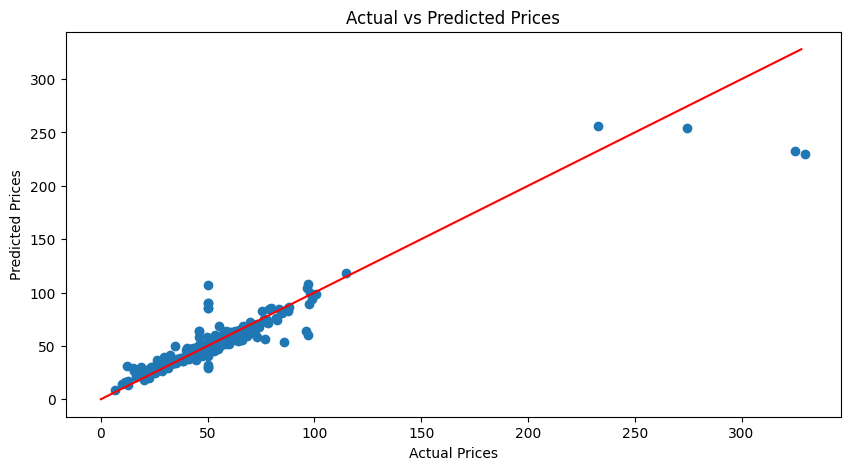

In [18]:
print("Model Score:", model.score(test, y_test))

import matplotlib.pyplot as plt
predictions = model.predict(test)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, predictions)
plt.plot(range(int(max(y_test))), range(int(max(y_test))), color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


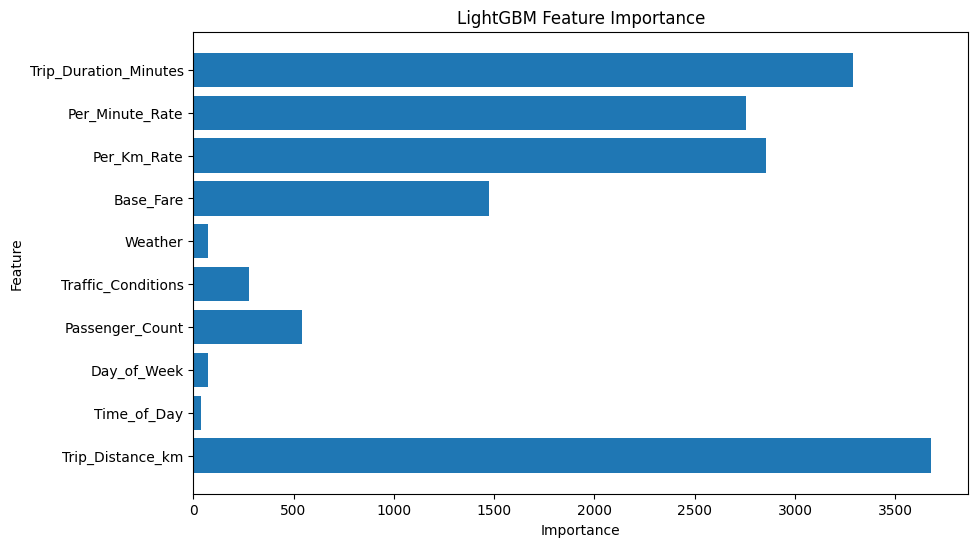

In [19]:
import matplotlib.pyplot as plt
import lightgbm as lgb

# Get feature importance
feature_importance = model.named_steps['lgbmregressor'].feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("LightGBM Feature Importance")
plt.show()
